In [62]:
import pandas as pd

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [64]:
file_path = 'FE_Course_Data/concrete.csv'  # Relative path to the file in the parent directory

In [65]:
df = pd.read_csv(file_path)
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [66]:
X = df.copy()
y = X.pop('CompressiveStrength')

In [67]:
baseline = RandomForestRegressor(criterion='absolute_error', random_state=0)

In [68]:
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)

In [69]:
baseline_score = -1 * baseline_score.mean()

In [70]:
print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 8.232


### Add three new ratio features to the dataset:

In [71]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [72]:
model = RandomForestRegressor(criterion='absolute_error', random_state=0)

In [73]:
baseline_score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)

In [74]:
score = -1 * baseline_score.mean()

In [75]:
print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 7.948


# Mutual Information

### feature utility metric

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
plt.style.use("seaborn-whitegrid")

In [78]:
file_path = 'FE_Course_Data/autos.csv'

In [79]:
df = pd.read_csv(file_path)

In [80]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [81]:
X = df.copy()
y = X.pop('price')

In [82]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

In [83]:
discrete_features = X.dtypes == int

In [84]:
discrete_features

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

In [85]:
from sklearn.feature_selection import mutual_info_regression

In [86]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series( mi_scores, name='MI SCORES', index = X.columns )
    mi_scores = mi_scores.sort_values(ascending=False)
    
    return mi_scores

In [87]:
mi_scores = make_mi_scores(X, y, discrete_features)

In [88]:
mi_scores

curb_weight          1.555590
horsepower           1.272822
engine_size          0.999766
highway_mpg          0.957547
city_mpg             0.860095
width                0.673959
length               0.617830
wheel_base           0.585202
make                 0.546048
fuel_system          0.480214
bore                 0.468704
peak_rpm             0.450484
stroke               0.383975
height               0.356875
num_of_cylinders     0.333249
drive_wheels         0.333158
symboling            0.227025
engine_type          0.150219
compression_ratio    0.135795
aspiration           0.087994
body_style           0.080624
fuel_type            0.047298
engine_location      0.036912
num_of_doors         0.012234
Name: MI SCORES, dtype: float64

In [114]:
def bar_plot( scores ):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

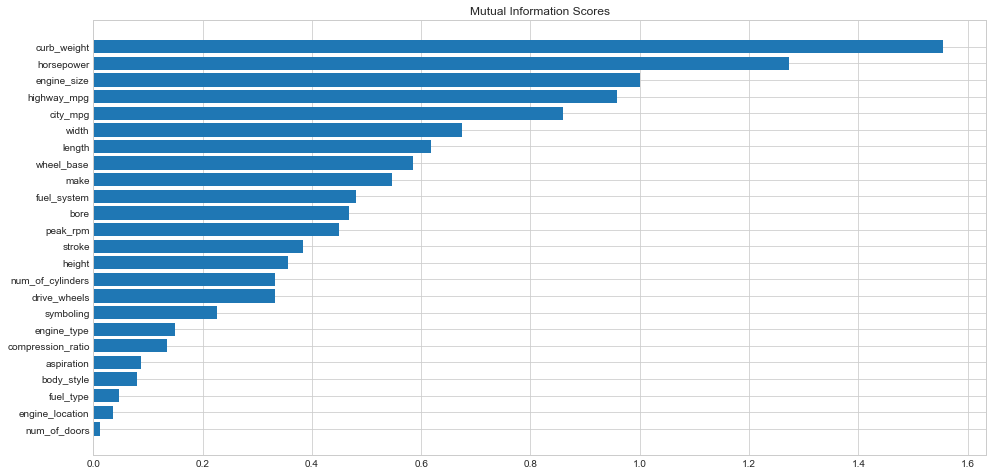

In [90]:
bar_plot(mi_scores)

In [91]:
import seaborn as sns

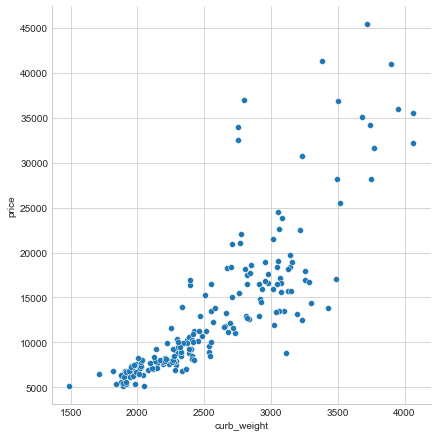

In [100]:
sns.relplot(x='curb_weight', y='price', height =6, data=df)

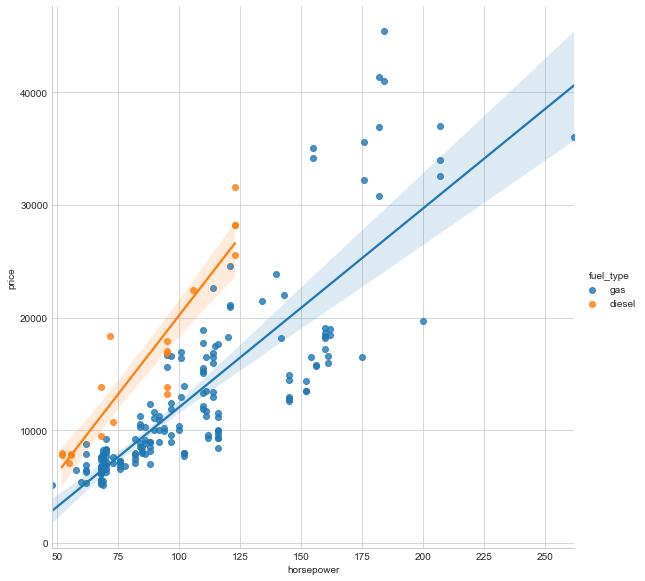

In [101]:
sns.lmplot(x="horsepower", y="price", hue="fuel_type", fit_reg = True, height=8, data=df)

### excersie

In [102]:
file_path = 'FE_Course_Data/ames.csv'  # Relative path to the file in the parent directory

In [103]:
df = pd.read_csv(file_path)

In [104]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900


In [105]:
X = df.copy()
y = X.pop('SalePrice')

In [106]:
for col in X.select_dtypes("object"):
    X[col], _ = X[col].factorize()

In [107]:
discrete_features = X.dtypes == int

In [108]:
discrete_features

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold            True
YearSold          True
SaleType          True
SaleCondition     True
Length: 78, dtype: bool

In [111]:
mi_scores = make_mi_scores(X,y, discrete_features=discrete_features)

In [112]:
mi_scores

OverallQual         0.591644
Neighborhood        0.573798
GrLivArea           0.495873
YearBuilt           0.436822
GarageArea          0.413582
                      ...   
Threeseasonporch    0.000570
Utilities           0.000399
PoolQC              0.000240
LandSlope           0.000007
MoSold              0.000000
Name: MI SCORES, Length: 78, dtype: float64

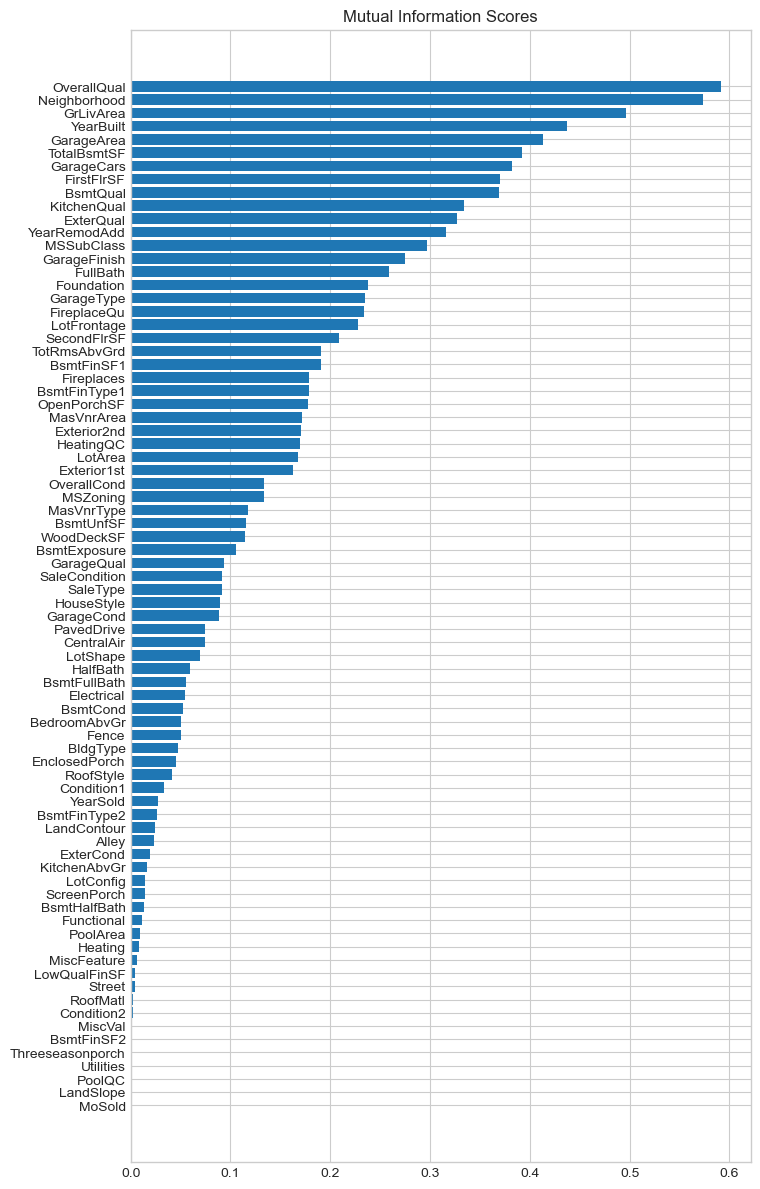

In [119]:
plt.figure(dpi=100, figsize=(8, 15))
bar_plot(mi_scores)

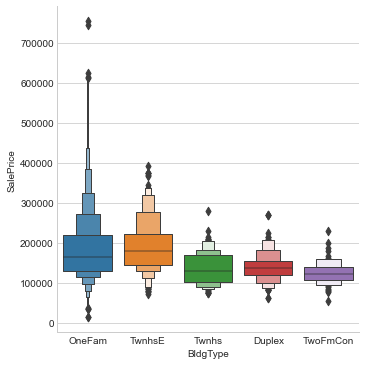

In [120]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

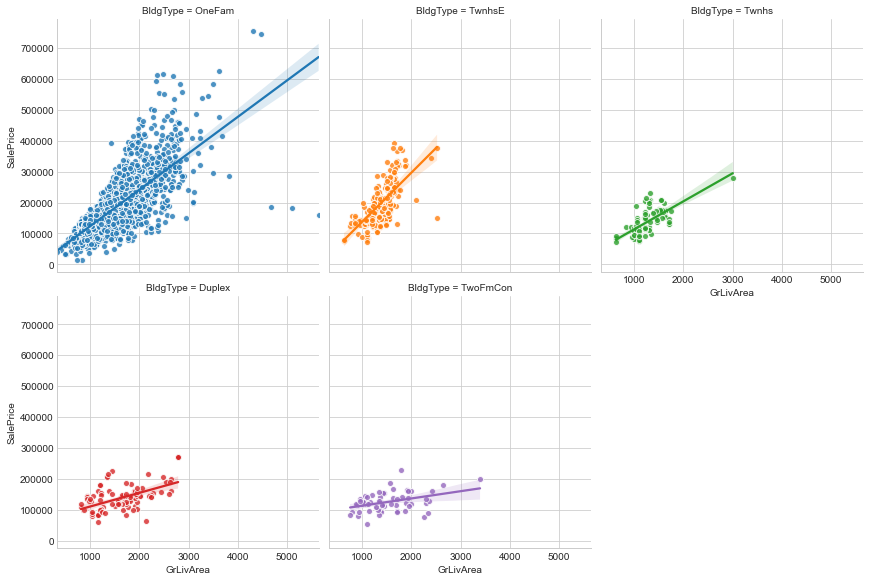

In [121]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

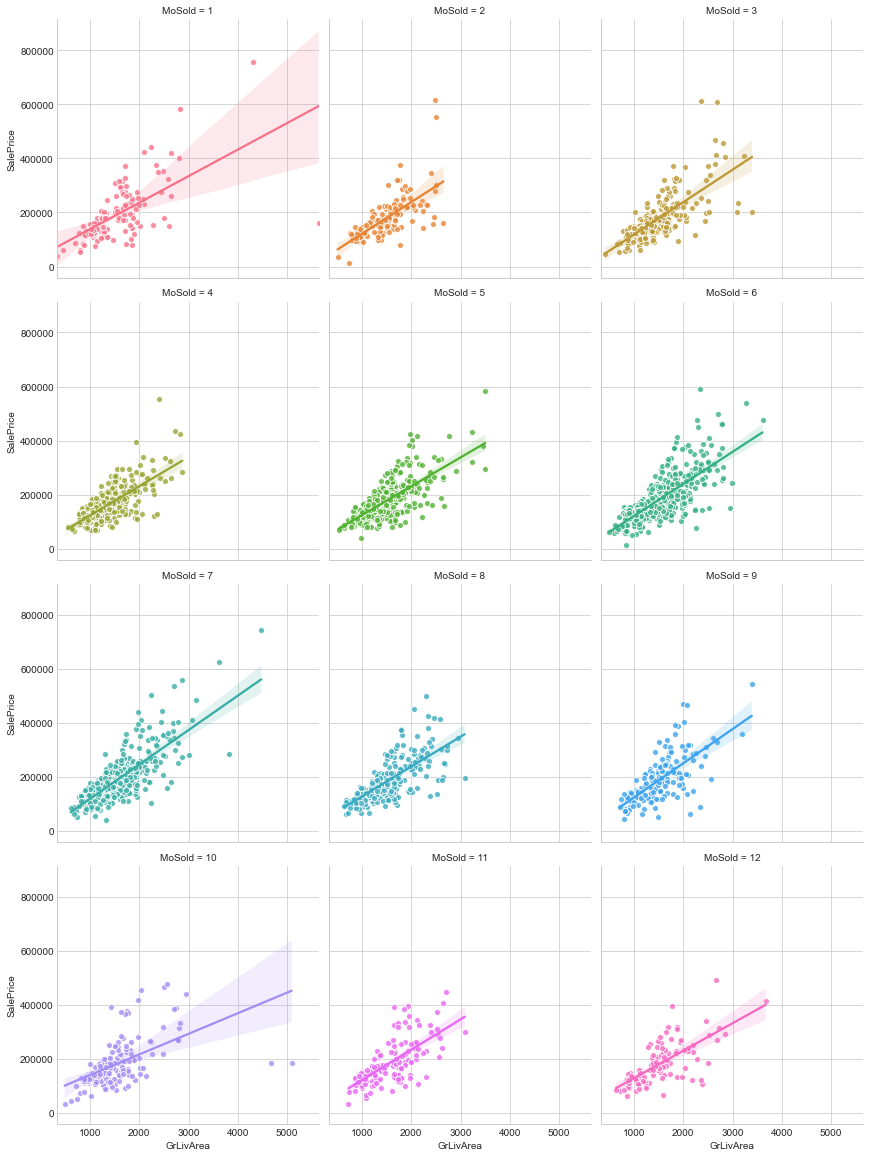

In [125]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="MoSold", col="MoSold",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

In [123]:
mi_scores.head(10)

OverallQual     0.591644
Neighborhood    0.573798
GrLivArea       0.495873
YearBuilt       0.436822
GarageArea      0.413582
TotalBsmtSF     0.392127
GarageCars      0.382101
FirstFlrSF      0.370287
BsmtQual        0.369491
KitchenQual     0.333610
Name: MI SCORES, dtype: float64

# Create Feature

In [127]:
accidents = pd.read_csv("FE_Course_Data/accidents.csv")
autos     = pd.read_csv("FE_Course_Data/autos.csv")
concrete  = pd.read_csv("FE_Course_Data/concrete.csv")
customer  = pd.read_csv("FE_Course_Data/customer.csv")

In [128]:
autos.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [129]:
autos["stroke_ratio"] = autos.stroke / autos.bore

In [130]:
autos[["stroke", "bore", "stroke_ratio"]].head()


,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [131]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)

In [132]:
accidents["LogWindSpeed"] = accidents.WindSpeed.apply(np.log1p)

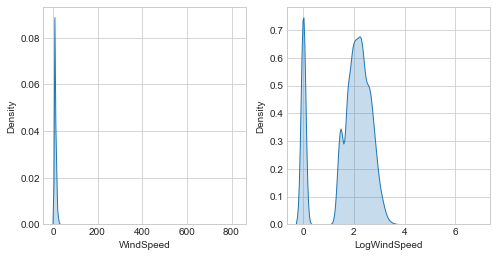

In [133]:
# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [134]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]

In [135]:
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

In [136]:
accidents[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [137]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,LogWindSpeed,RoadwayFeatures
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,2.833213,0
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,2.322388,0
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,2.208274,0
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,1.916923,0
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,2.079442,0


In [138]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]

In [139]:
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

In [140]:
concrete[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [141]:
customer[["Type", "Level"]] = (  # Create two new features
    customer["Policy"]           # from the Policy feature
    .str                         # through the string accessor
    .split(" ", expand=True)     # by splitting on " "
                                 # and expanding the result into separate columns
)

customer[["Policy", "Type", "Level"]].head(10)

,Policy,Type,Level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [142]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [143]:
customer["AverageIncome"] = (
    customer.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [144]:
customer["StateFreq"] = (
    customer.groupby("State")
    ["State"]
    .transform("count")
    / customer.State.count()
)

customer[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [145]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

In [146]:
# Create the average claim amount by coverage type, on the training set
df_train["AverageClaim"] = df_train.groupby("Coverage")["ClaimAmount"].transform("mean")

In [147]:
df_train.head()

,Unnamed: 0,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,...,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize,Type,Level,AverageIncome,StateFreq,AverageClaim
3883,3883,SP56326,Arizona,7452.998789,No,Premium,High School or Below,1/1/11,Medical Leave,F,...,Offer1,Branch,670.581817,Four-Door Car,Medsize,Personal,L3,37405.402231,0.186446,675.497712
2733,2733,XZ23352,California,3839.746159,No,Basic,High School or Below,2/13/11,Unemployed,F,...,Offer4,Call Center,763.200000,SUV,Small,Corporate,L3,37558.946667,0.344865,375.952130
2212,2212,HT48275,Oregon,5532.753182,No,Basic,Bachelor,1/19/11,Employed,M,...,Offer2,Call Center,270.311239,Two-Door Car,Medsize,Personal,L3,37557.283353,0.284760,375.952130
7491,7491,WR85740,Arizona,8149.769437,No,Basic,Doctor,1/26/11,Unemployed,F,...,Offer2,Call Center,340.800000,Two-Door Car,Medsize,Corporate,L3,37405.402231,0.186446,375.952130
3708,3708,TL18087,Washington,3059.282091,No,Extended,Bachelor,2/27/11,Employed,M,...,Offer2,Web,369.600000,Four-Door Car,Medsize,Personal,L2,38122.733083,0.087366,489.320229


In [148]:
# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["Coverage", "AverageClaim"]].drop_duplicates(),
    on="Coverage",
    how="left",
)

In [149]:
df_valid[["Coverage", "AverageClaim"]].head(10)

,Coverage,AverageClaim
0,Premium,675.497712
1,Basic,375.952130
2,Basic,375.952130
3,Premium,675.497712
4,Extended,489.320229
5,Basic,375.952130
6,Basic,375.952130
7,Basic,375.952130
8,Basic,375.952130
9,Premium,675.497712


# Excercise